In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv("SBAnational.csv")
df_copy = df.copy()

<ipython-input-2-695bf76b1fd4>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("SBAnational.csv")


In [ ]:
df_copy.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [ ]:
df_copy.shape

(899164, 27)

In [ ]:
df_copy.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
df_copy.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist','RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)
df_copy.isnull().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725369
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
df_copy.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [ ]:
df_copy[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"


In [ ]:
df_copy[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = \
df_copy[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))

In [ ]:
df_copy['ApprovalFY'].apply(type).value_counts()

<class 'int'>    759570
<class 'str'>    126670
Name: ApprovalFY, dtype: int64

In [ ]:
df_copy['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, '2004', '1994',
       '1979', '1976', '1975', '1974', '1977', '1981', '1982', '1983',
       '1984', '1978', '1980', '1968', '1976A', '1969', '1995', '1970',
       '2005', '1996', '1971', 1996, 1971], dtype=object)

In [ ]:
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x

In [ ]:
df_copy['ApprovalFY'] = df_copy['ApprovalFY'].apply(clean_str).astype('int64')

In [ ]:
df_copy = df_copy.astype({'Zip': 'str', 'NewExist': 'int64', 'UrbanRural': 'str', 'DisbursementGross': 'float', 'BalanceGross': 'float',
                          'ChgOffPrinGr': 'float', 'GrAppv': 'float', 'SBA_Appv': 'float'})

In [ ]:
df_copy['Industry'] = df_copy['NAICS'].astype('str').apply(lambda x: x[:2])

df_copy['Industry'] = df_copy['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

df_copy.dropna(subset=['Industry'], inplace=True)

In [ ]:
df_copy.loc[(df_copy['FranchiseCode'] <= 1), 'IsFranchise'] = 0
df_copy.loc[(df_copy['FranchiseCode'] > 1), 'IsFranchise'] = 1

In [ ]:
df_copy['NewExist'].unique()

array([2, 1, 0])

In [ ]:
df_copy = df_copy[(df_copy['NewExist'] == 1) | (df_copy['NewExist'] == 2)]

df_copy.loc[(df_copy['NewExist'] == 1), 'NewBusiness'] = 0
df_copy.loc[(df_copy['NewExist'] == 2), 'NewBusiness'] = 1

<ipython-input-18-c47d382995e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.loc[(df_copy['NewExist'] == 1), 'NewBusiness'] = 0


In [ ]:
df_copy['RevLineCr'].unique()

array(['N', 'Y', '0', 'T', '`', ',', '1', 'C', '2', 'R', '7', 'A', '-',
       'Q'], dtype=object)

In [ ]:
df_copy['LowDoc'].unique()

array(['Y', 'N', 'C', '1', 'S', 'R', 'A', '0'], dtype=object)

In [ ]:
df_copy = df_copy[(df_copy['RevLineCr'] == 'Y') | (df_copy['RevLineCr'] == 'N')]
df_copy = df_copy[(df_copy['LowDoc'] == 'Y') | (df_copy['LowDoc'] == 'N')]

df_copy['RevLineCr'] = np.where(df_copy['RevLineCr'] == 'N', 0, 1)
df_copy['LowDoc'] = np.where(df_copy['LowDoc'] == 'N', 0, 1)

In [ ]:
df_copy['Default'] = np.where(df_copy['MIS_Status'] == 'P I F', 0, 1)
df_copy['Default'].value_counts()

0    358558
1     98382
Name: Default, dtype: int64

In [ ]:
df_copy[['ApprovalDate', 'DisbursementDate']] = df_copy[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

In [ ]:
df_copy['DaysToDisbursement'] = df_copy['DisbursementDate'] - df_copy['ApprovalDate']
df_copy['DaysToDisbursement'] = df_copy['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d') - 1]).astype('int64')

In [ ]:
df_copy['DisbursementFY'] = df_copy['DisbursementDate'].map(lambda x: x.year)

In [ ]:
df_copy['StateSame'] = np.where(df_copy['State'] == df_copy['BankState'], 1, 0)

In [ ]:
df_copy['SBA_AppvPct'] = df_copy['SBA_Appv'] / df_copy['GrAppv']

In [ ]:
df_copy['AppvDisbursed'] = np.where(df_copy['DisbursementGross'] == df_copy['GrAppv'], 1, 0)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456940 entries, 0 to 899161
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   LoanNr_ChkDgt       456940 non-null  int64         
 1   Name                456940 non-null  object        
 2   City                456940 non-null  object        
 3   State               456940 non-null  object        
 4   Zip                 456940 non-null  object        
 5   Bank                456940 non-null  object        
 6   BankState           456940 non-null  object        
 7   NAICS               456940 non-null  int64         
 8   ApprovalDate        456940 non-null  datetime64[ns]
 9   ApprovalFY          456940 non-null  int64         
 10  Term                456940 non-null  int64         
 11  NoEmp               456940 non-null  int64         
 12  NewExist            456940 non-null  int64         
 13  CreateJob           456940 no

In [ ]:
df_copy = df_copy.astype({'IsFranchise': 'int64', 'NewBusiness': 'int64'})
df_copy.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int64
Term                           int64
NoEmp                          int64
NewExist                       int64
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                  int64
UrbanRural                    object
RevLineCr                      int64
LowDoc                         int64
ChgOffDate                    object
DisbursementDate      datetime64[ns]
DisbursementGross            float64
BalanceGross                 float64
MIS_Status                    object
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
I

In [ ]:
df_copy.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'NAICS', 'ApprovalDate', 'NewExist', 'FranchiseCode',
                      'ChgOffDate', 'DisbursementDate', 'BalanceGross', 'ChgOffPrinGr', 'SBA_Appv', 'MIS_Status'], inplace=True)

In [ ]:
df_copy.isnull().sum()

State                 0
BankState             0
ApprovalFY            0
Term                  0
NoEmp                 0
CreateJob             0
RetainedJob           0
UrbanRural            0
RevLineCr             0
LowDoc                0
DisbursementGross     0
GrAppv                0
Industry              0
IsFranchise           0
NewBusiness           0
Default               0
DaysToDisbursement    0
DisbursementFY        0
StateSame             0
SBA_AppvPct           0
AppvDisbursed         0
dtype: int64

In [ ]:
df_copy['RealEstate'] = np.where(df_copy['Term'] >= 240, 1, 0)

In [ ]:
df_copy['GreatRecession'] = np.where(((2007 <= df_copy['DisbursementFY']) & (df_copy['DisbursementFY'] <= 2009)) |
                                     ((df_copy['DisbursementFY'] < 2007) & (df_copy['DisbursementFY'] + (df_copy['Term']/12) >= 2007)), 1, 0)

In [ ]:
df_copy = df_copy[df_copy['DisbursementFY'] <= 2010]

In [ ]:
df_copy.shape

(438504, 23)

In [ ]:
df_copy.describe(include=['object', 'float', 'int'])

,State,BankState,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,...,IsFranchise,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,RealEstate,GreatRecession
count,438504,438504,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504,438504.000000,438504.000000,...,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000
unique,51,53,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CA,NC,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59171,55644,NaN,NaN,NaN,NaN,NaN,270482,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.665604,94.119445,9.794887,1.843611,4.568973,NaN,0.418959,0.057247,...,0.030597,0.263840,0.221918,109.090631,2002.705704,0.454094,0.654071,0.636478,0.111972,0.733934
std,NaN,NaN,5.492623,68.548785,57.674184,16.496650,15.330176,NaN,0.493389,0.232314,...,0.172224,0.440714,0.415537,182.221498,5.403909,0.497889,0.179932,0.481014,0.315332,0.441900
min,NaN,NaN,1984.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,-3614.000000,1984.000000,0.000000,0.050000,0.000000,0.000000,0.000000
25%,NaN,NaN,1999.000000,58.000000,2.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,27.000000,2000.000000,0.000000,0.500000,0.000000,0.000000,0.000000
50%,NaN,NaN,2005.000000,84.000000,4.000000,0.000000,1.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,51.000000,2005.000000,0.000000,0.500000,1.000000,0.000000,1.000000
75%,NaN,NaN,2007.000000,90.000000,9.000000,1.000000,4.000000,NaN,1.000000,0.000000,...,0.000000,1.000000,0.000000,109.000000,2007.000000,1.000000,0.829994,1.000000,0.000000,1.000000


In [ ]:
df_copy['DisbursedGreaterAppv'] = np.where(df_copy['DisbursementGross'] > df_copy['GrAppv'], 1, 0)

In [ ]:
df_copy = df_copy[df_copy['DaysToDisbursement'] >= 0]
df_copy.shape

(438090, 24)

In [ ]:
df_copy.describe(include=['object', 'float', 'int'])

,State,BankState,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,...,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,RealEstate,GreatRecession,DisbursedGreaterAppv
count,438090,438090,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090,438090.000000,438090.000000,...,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000
unique,51,53,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CA,NC,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59121,55628,NaN,NaN,NaN,NaN,NaN,270261,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.662987,94.113178,9.795026,1.843525,4.567514,NaN,0.419122,0.057189,...,0.263825,0.222039,109.220368,2002.703264,0.453993,0.654037,0.636351,0.111979,0.734509,0.314639
std,NaN,NaN,5.490509,68.545279,57.699074,16.503378,15.332166,NaN,0.493416,0.232204,...,0.440706,0.415618,182.165509,5.401641,0.497879,0.179937,0.481050,0.315341,0.441595,0.464372
min,NaN,NaN,1984.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,1984.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1999.000000,58.000000,2.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,27.000000,2000.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,2005.000000,84.000000,4.000000,0.000000,1.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,51.000000,2005.000000,0.000000,0.500000,1.000000,0.000000,1.000000,0.000000
75%,NaN,NaN,2007.000000,90.000000,9.000000,1.000000,4.000000,NaN,1.000000,0.000000,...,1.000000,0.000000,109.000000,2007.000000,1.000000,0.829500,1.000000,0.000000,1.000000,1.000000


<ipython-input-41-41c97a7718cf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_copy.corr()


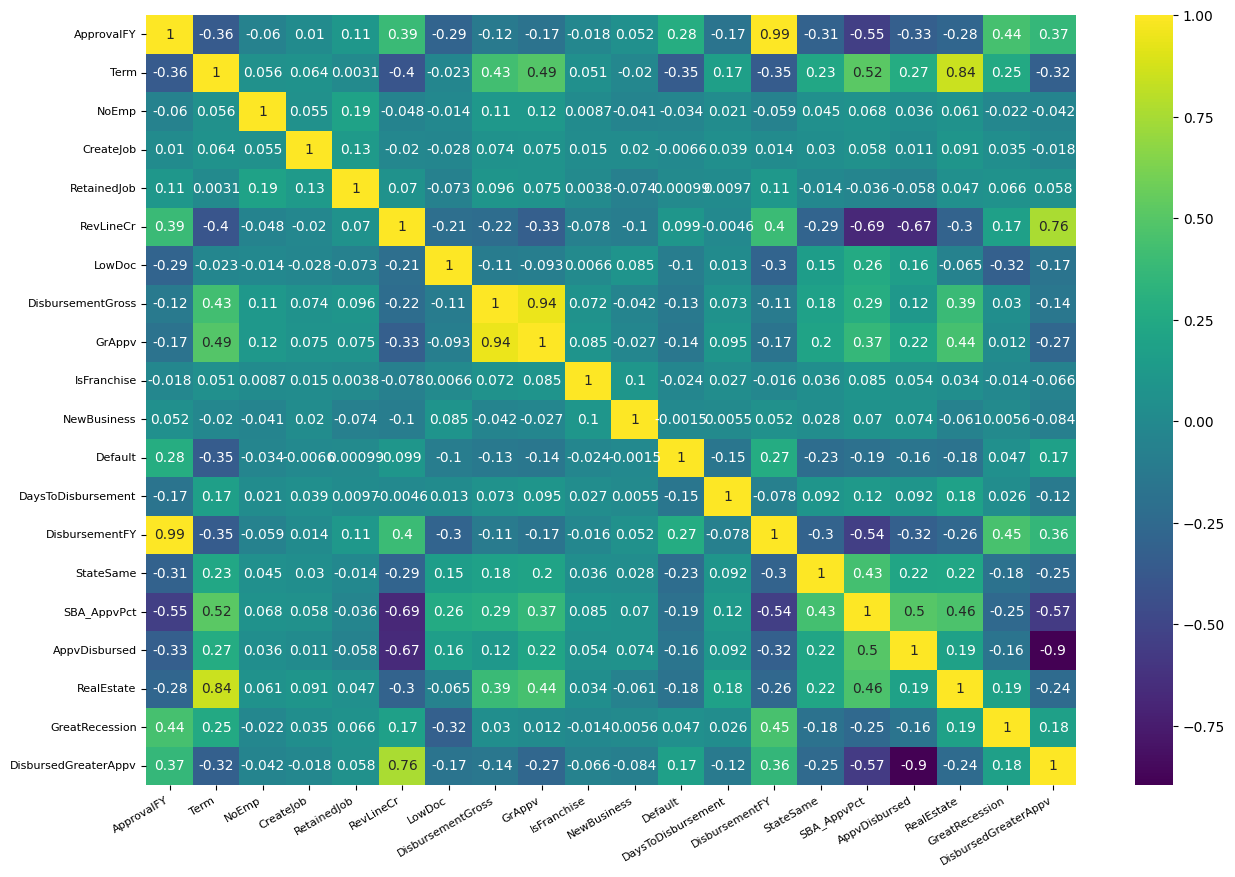

In [ ]:
cor_fig, cor_ax = plt.subplots(figsize=(15, 10))
corr_matrix = df_copy.corr()
cor_ax = sns.heatmap(corr_matrix, annot=True, cmap = 'viridis')
plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
plt.yticks(fontsize=8)

plt.show()

<ipython-input-42-e467f450c2aa>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending=False)
<ipython-input-42-e467f450c2aa>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)
<ipython-input-42-e467f450c2aa>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)
<ipython-input-42-e467f450c2aa>:19: UserWarning: FixedFormatter sh

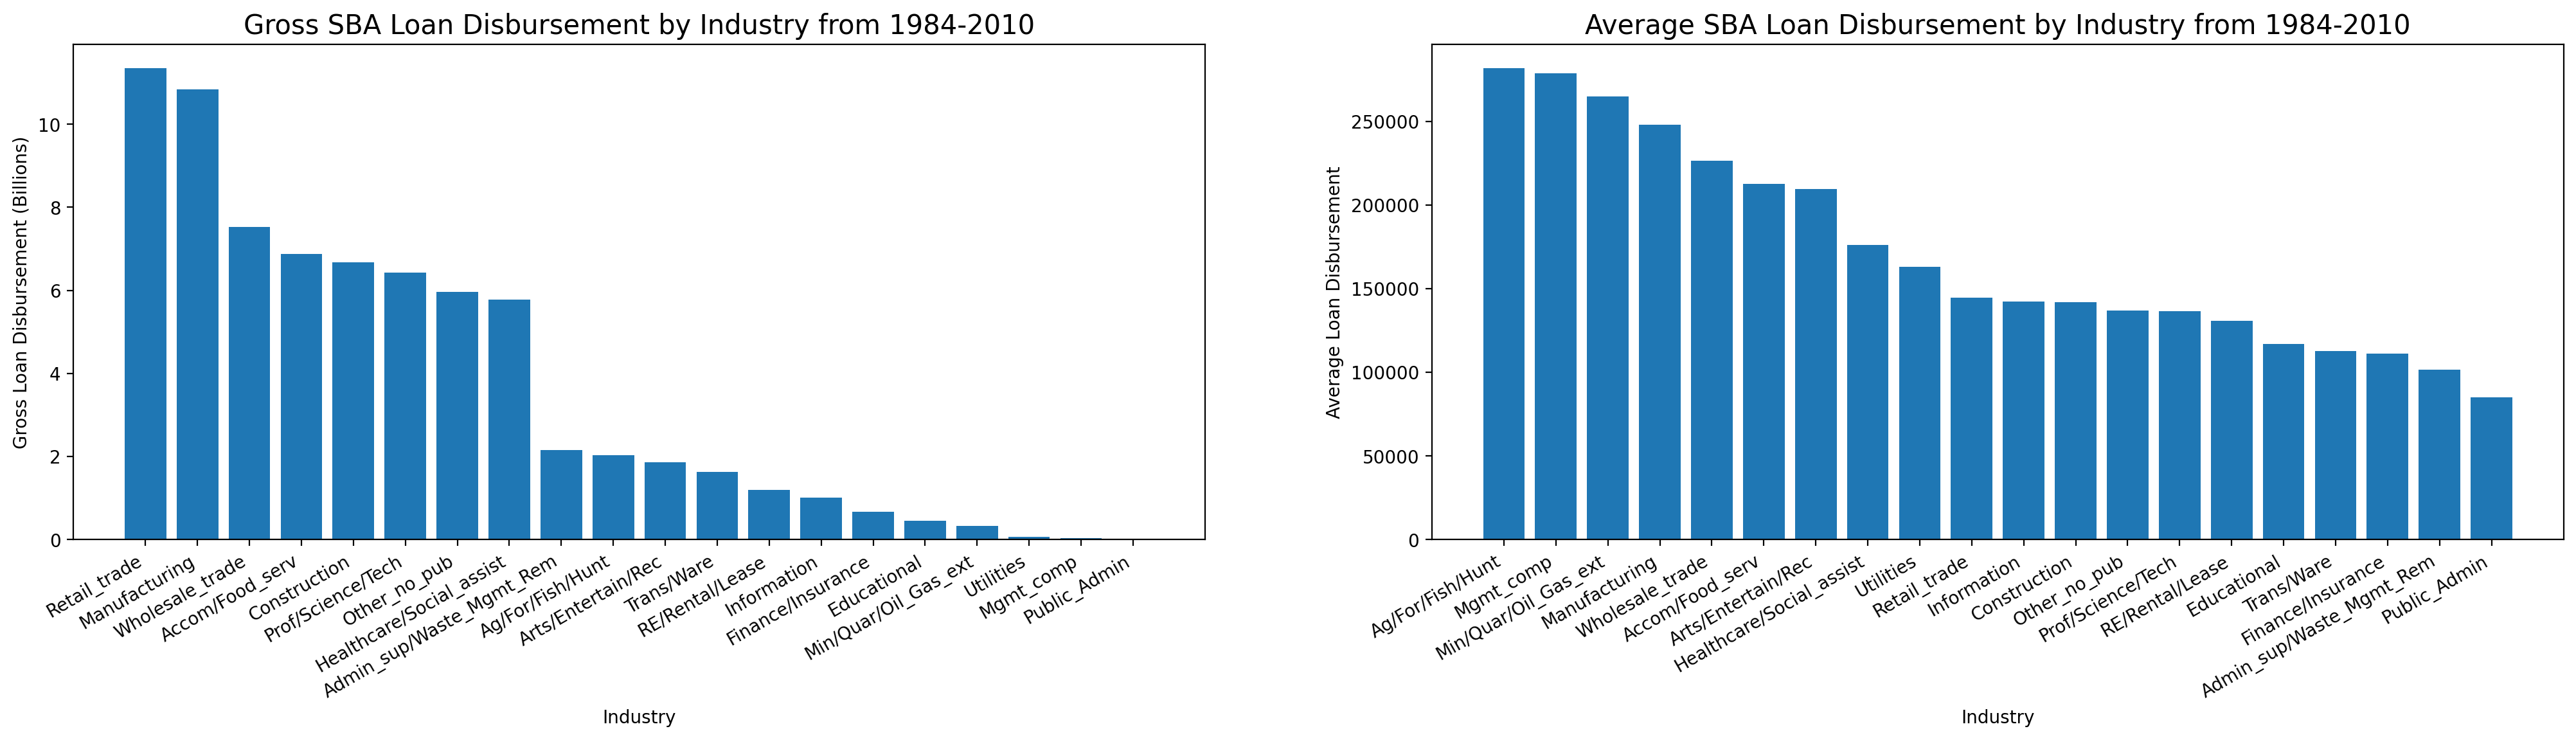

In [ ]:
industry_group = df_copy.groupby(['Industry'])

df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending=False)
df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)

fig = plt.figure(figsize=(25, 5), dpi=200)

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.bar(df_industrySum.index, df_industrySum['DisbursementGross'] / 1000000000)
ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)

ax1.set_title('Gross SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax1.set_xlabel('Industry')
ax1.set_ylabel('Gross Loan Disbursement (Billions)')

ax2.bar(df_industryAve.index, df_industryAve['DisbursementGross'])
ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)

ax2.set_title('Average SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax2.set_xlabel('Industry')
ax2.set_ylabel('Average Loan Disbursement')

plt.show()

<ipython-input-43-bcfb51932673>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_industryAve['DaysToDisbursement'].sort_values(ascending=False).index, rotation=35,


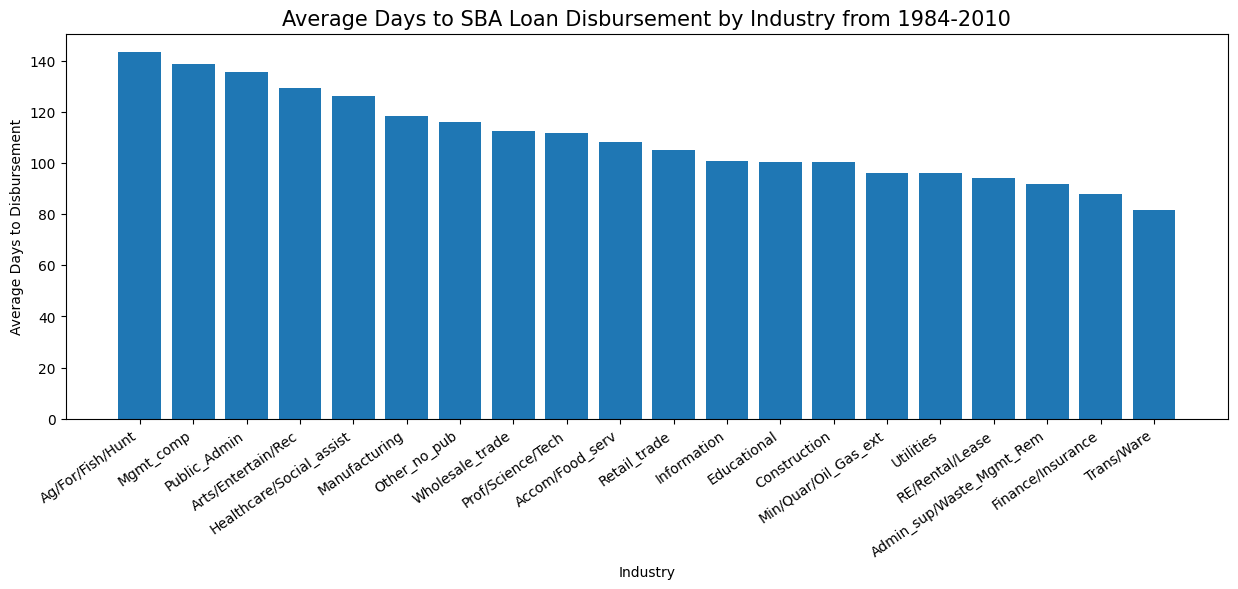

In [ ]:
fig2, ax = plt.subplots(figsize=(15, 5))

ax.bar(df_industryAve.index, df_industryAve['DaysToDisbursement'].sort_values(ascending=False))
ax.set_xticklabels(df_industryAve['DaysToDisbursement'].sort_values(ascending=False).index, rotation=35,
                   horizontalalignment='right', fontsize=10)

ax.set_title('Average Days to SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax.set_xlabel('Industry')
ax.set_ylabel('Average Days to Disbursement')

plt.show()

<ipython-input-44-9c0736197e3c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1a.set_xticklabels(df_copy.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default').index,


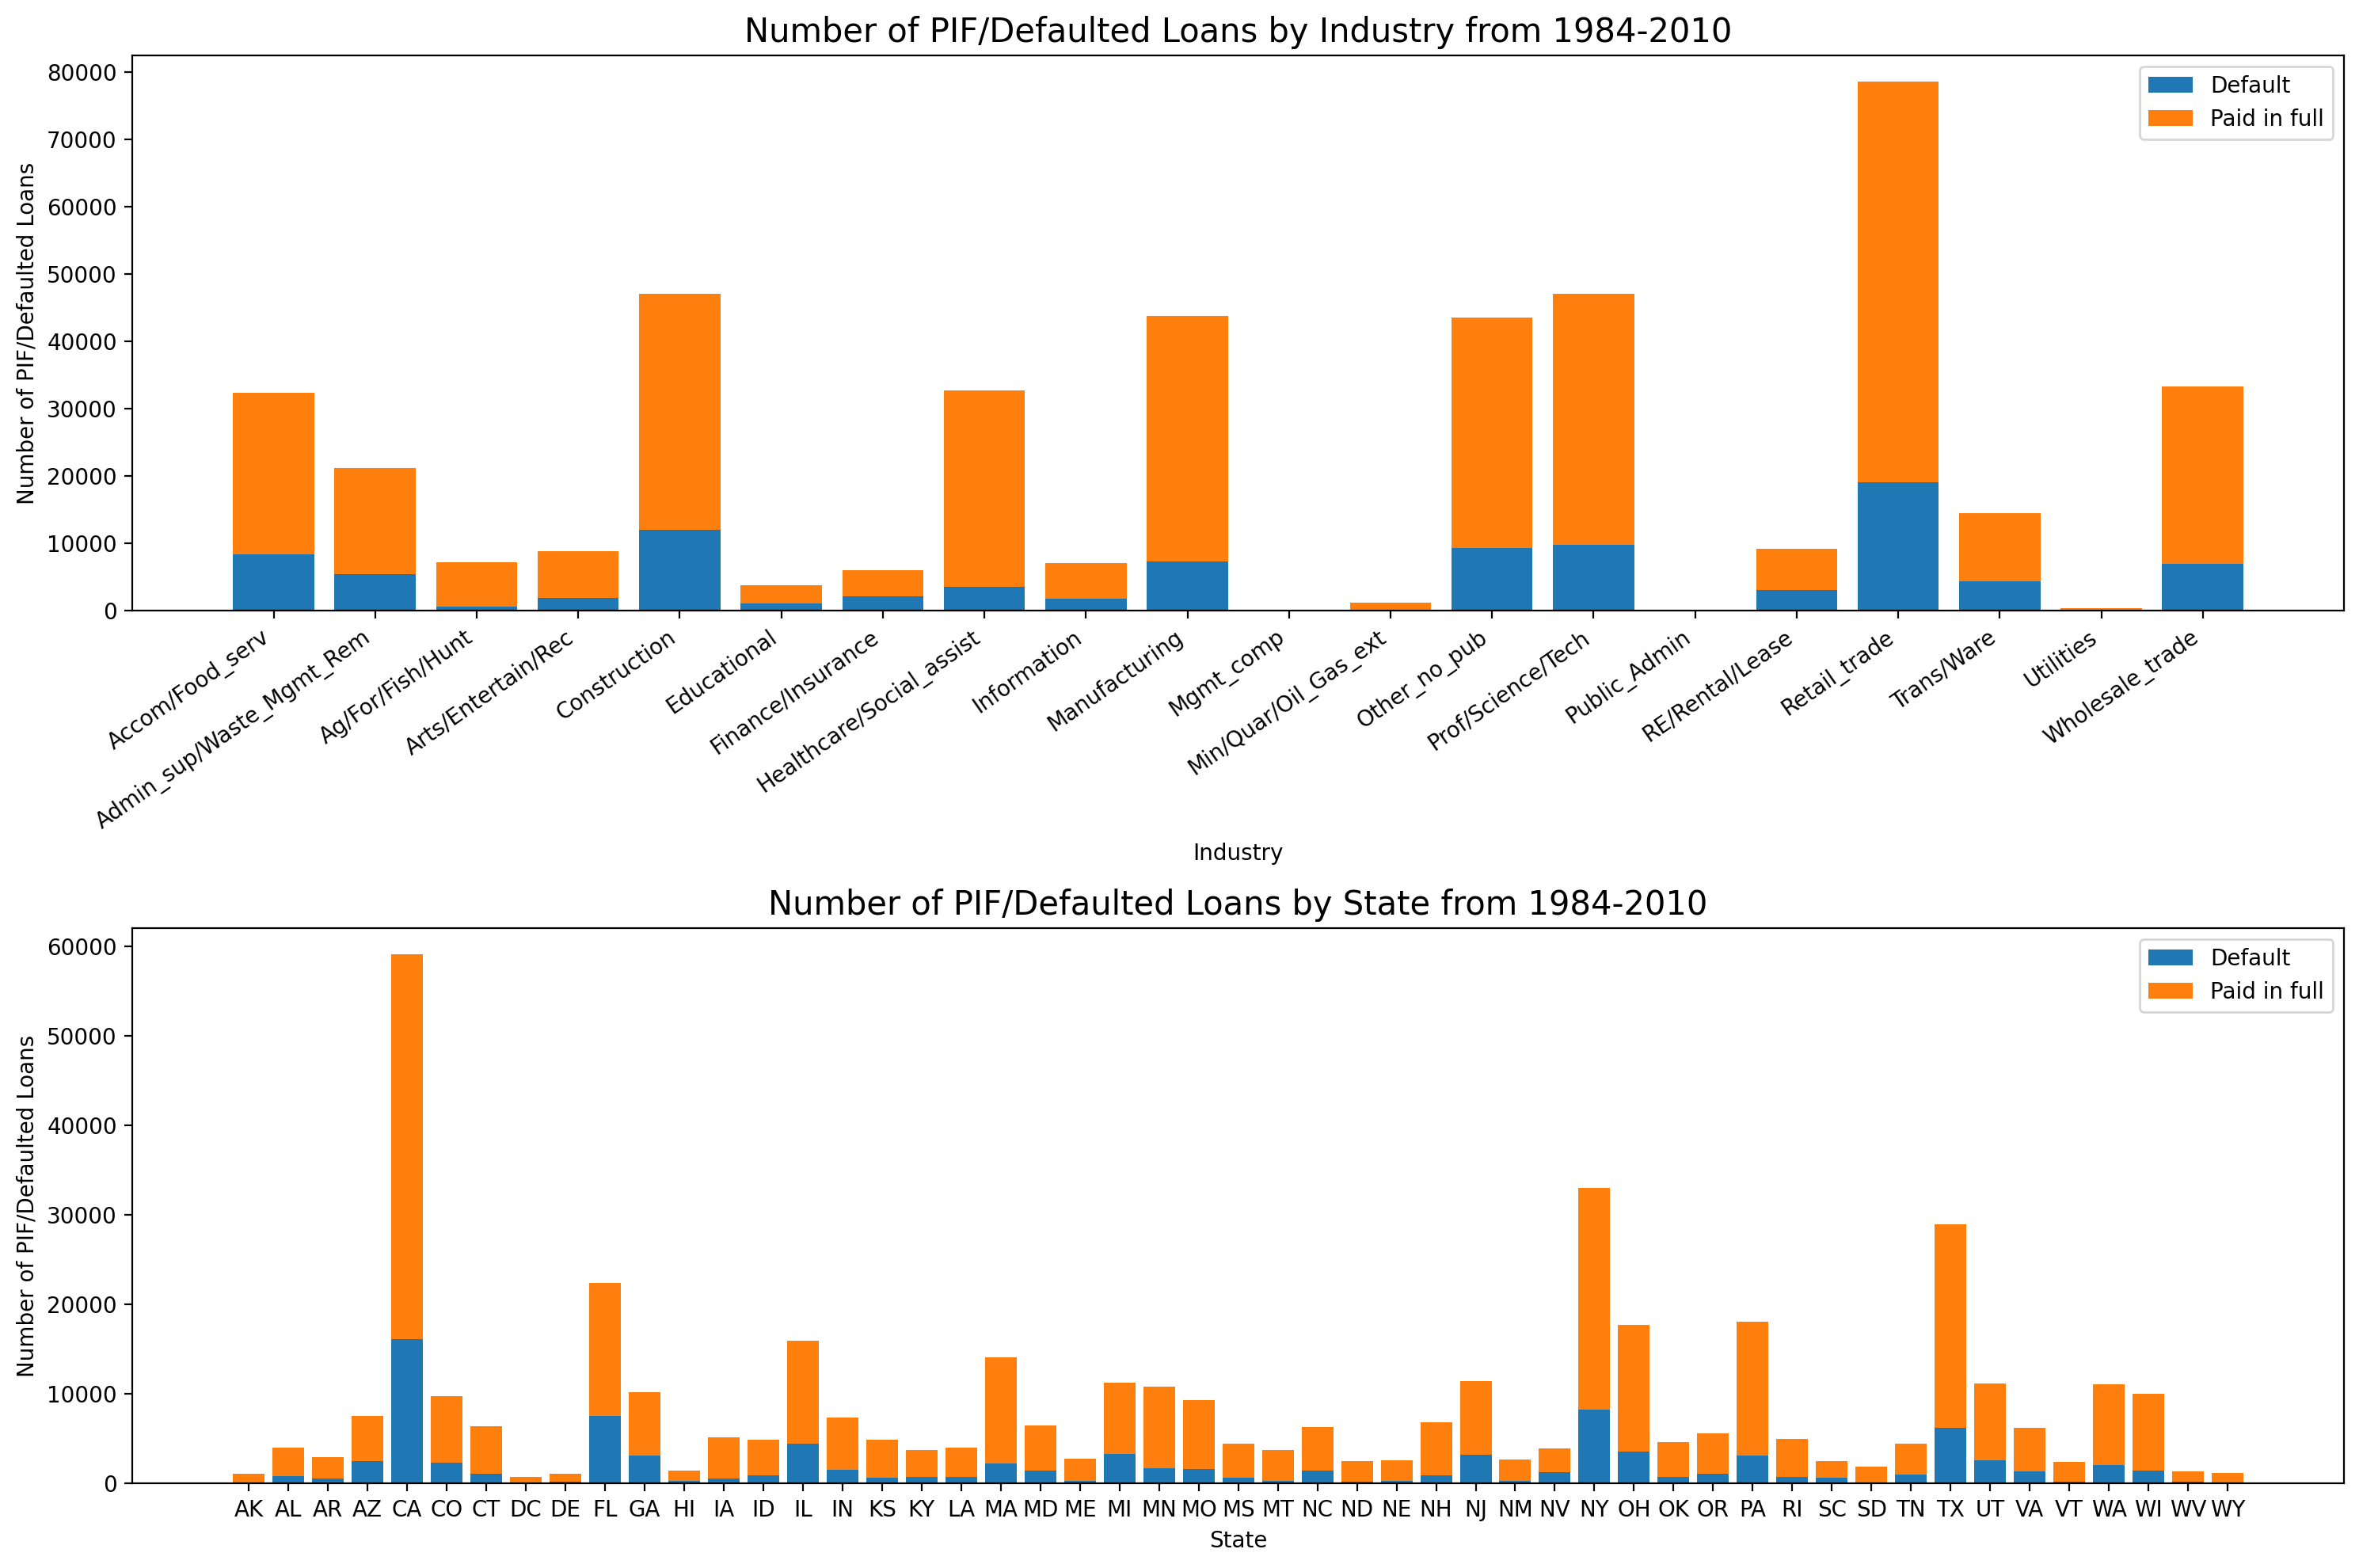

In [ ]:
fig3 = plt.figure(figsize=(15, 10), dpi =200)

ax1a = plt.subplot(2, 1, 1)
ax2a = plt.subplot(2, 1, 2)

def stacked_setup(df, col, axes, stack_col='Default'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    axes.bar(data.index, data[1], label='Default')
    axes.bar(data.index, data[0], bottom=data[1], label='Paid in full')

stacked_setup(df=df_copy, col='Industry', axes=ax1a)
ax1a.set_xticklabels(df_copy.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default').index,
                     rotation=35, horizontalalignment='right', fontsize=10)

ax1a.set_title('Number of PIF/Defaulted Loans by Industry from 1984-2010', fontsize=15)
ax1a.set_xlabel('Industry')
ax1a.set_ylabel('Number of PIF/Defaulted Loans')
ax1a.legend()


stacked_setup(df=df_copy, col='State', axes=ax2a)

ax2a.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
ax2a.set_xlabel('State')
ax2a.set_ylabel('Number of PIF/Defaulted Loans')
ax2a.legend()

plt.tight_layout()
plt.show()

In [ ]:
def_ind = df_copy.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default')
def_ind['Def_Percent'] = def_ind[1]/(def_ind[1] + def_ind[0])
def_ind

Default,0,1,Def_Percent
Industry,,,
Accom/Food_serv,23936,8381,0.259337
Admin_sup/Waste_Mgmt_Rem,15774,5427,0.255978
Ag/For/Fish/Hunt,6536,657,0.091339
Arts/Entertain/Rec,6976,1917,0.215563
Construction,34999,12048,0.256084
Educational,2750,1070,0.280105
Finance/Insurance,3984,2093,0.344413
Healthcare/Social_assist,29192,3571,0.108995
Information,5222,1830,0.259501


In [ ]:
def_state = df_copy.groupby(['State', 'Default'])['State'].count().unstack('Default')
def_state['Def_Percent'] = def_state[1]/(def_state[1] + def_state[0])
def_state

Default,0,1,Def_Percent
State,,,
AK,979,94,0.087605
AL,3192,805,0.201401
AR,2414,528,0.179470
AZ,5119,2473,0.325738
CA,42983,16138,0.272966
CO,7439,2349,0.239988
CT,5328,1064,0.166458
DC,567,157,0.216851
DE,841,246,0.226311


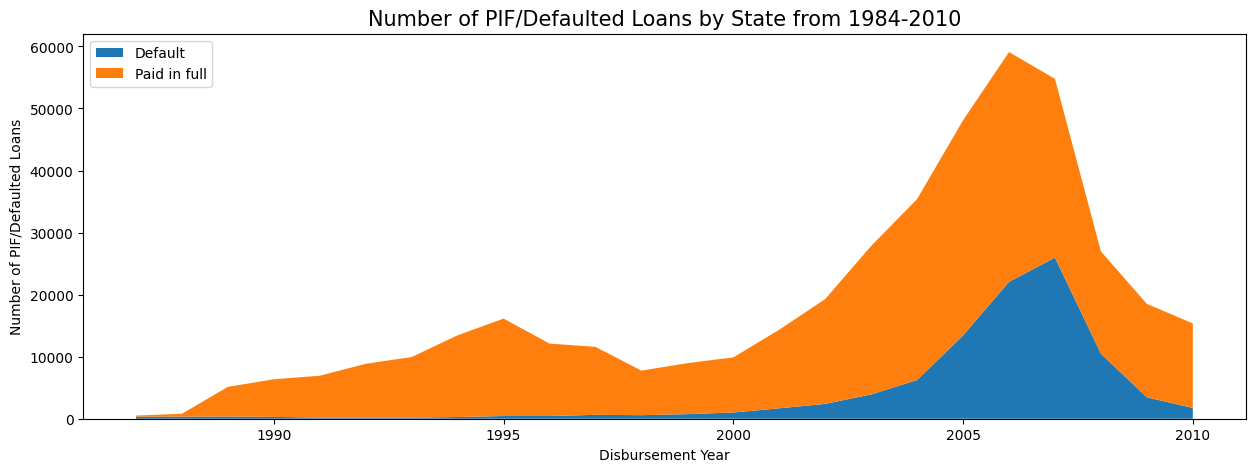

In [ ]:
fig4, ax4 = plt.subplots(figsize=(15, 5))

stack_data = df_copy.groupby(['DisbursementFY', 'Default'])['DisbursementFY'].count().unstack('Default')
x = stack_data.index
y = [stack_data[1], stack_data[0]]

ax4.stackplot(x, y, labels=['Default', 'Paid in full'])
ax4.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
ax4.set_xlabel('Disbursement Year')
ax4.set_ylabel('Number of PIF/Defaulted Loans')
ax4.legend(loc='upper left')

plt.show()

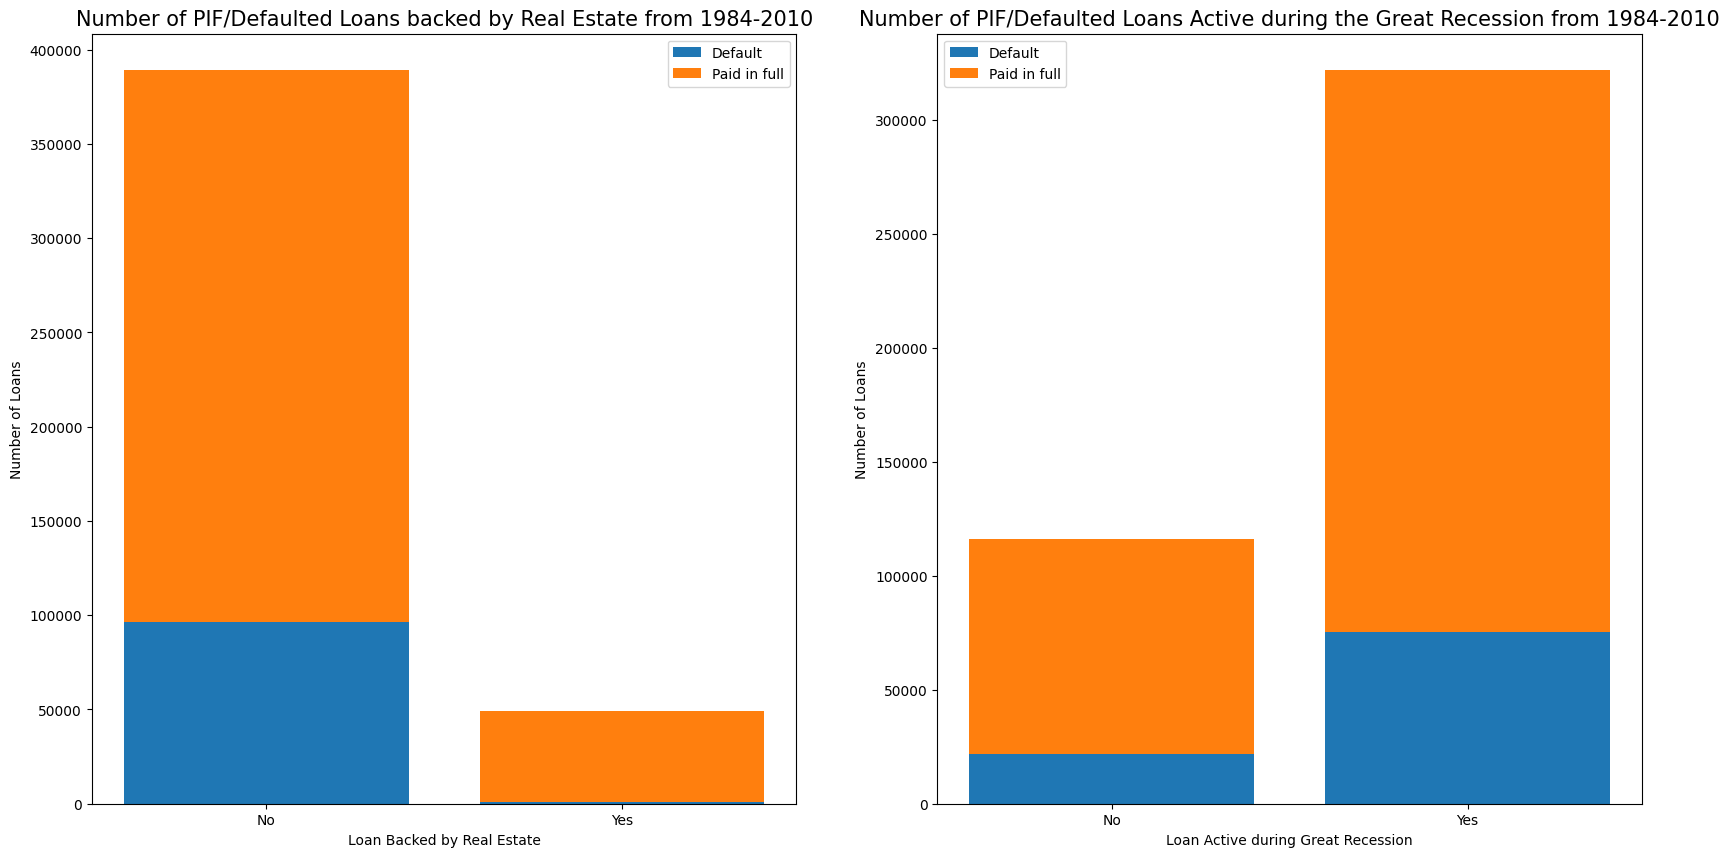

In [ ]:
fig5 = plt.figure(figsize=(20, 10))

ax1b = fig5.add_subplot(1, 2, 1)
ax2b = fig5.add_subplot(1, 2, 2)

stacked_setup(df=df_copy, col='RealEstate', axes=ax1b)
ax1b.set_xticks(df_copy.groupby(['RealEstate', 'Default'])['RealEstate'].count().unstack('Default').index)
ax1b.set_xticklabels(labels=['No', 'Yes'])

ax1b.set_title('Number of PIF/Defaulted Loans backed by Real Estate from 1984-2010', fontsize=15)
ax1b.set_xlabel('Loan Backed by Real Estate')
ax1b.set_ylabel('Number of Loans')
ax1b.legend()

stacked_setup(df=df_copy, col='GreatRecession', axes=ax2b)
ax2b.set_xticks(df_copy.groupby(['GreatRecession', 'Default'])['GreatRecession'].count().unstack('Default').index)
ax2b.set_xticklabels(labels=['No', 'Yes'])

ax2b.set_title('Number of PIF/Defaulted Loans Active during the Great Recession from 1984-2010', fontsize=15)
ax2b.set_xlabel('Loan Active during Great Recession')
ax2b.set_ylabel('Number of Loans')
ax2b.legend()

plt.show()

In [ ]:
def_re = df_copy.groupby(['RealEstate', 'Default'])['RealEstate'].count().unstack('Default')
def_re['Def_Percent'] = def_re[1]/(def_re[1] + def_re[0])
def_re

Default,0,1,Def_Percent
RealEstate,,,
0,292446,96587,0.248275
1,48371,686,0.013984


In [ ]:
def_gr = df_copy.groupby(['GreatRecession', 'Default'])['GreatRecession'].count().unstack('Default')
def_gr['Def_Percent'] = def_gr[1]/(def_gr[1] + def_gr[0])
def_gr

Default,0,1,Def_Percent
GreatRecession,,,
0,94279,22030,0.189409
1,246538,75243,0.233833


In [ ]:
df_copy.dtypes

State                    object
BankState                object
ApprovalFY                int64
Term                      int64
NoEmp                     int64
CreateJob                 int64
RetainedJob               int64
UrbanRural               object
RevLineCr                 int64
LowDoc                    int64
DisbursementGross       float64
GrAppv                  float64
Industry                 object
IsFranchise               int64
NewBusiness               int64
Default                   int64
DaysToDisbursement        int64
DisbursementFY            int64
StateSame                 int64
SBA_AppvPct             float64
AppvDisbursed             int64
RealEstate                int64
GreatRecession            int64
DisbursedGreaterAppv      int64
dtype: object

In [ ]:
df_copy = pd.get_dummies(df_copy)

df_copy.head()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,RevLineCr,LowDoc,DisbursementGross,GrAppv,IsFranchise,...,Industry_Mgmt_comp,Industry_Min/Quar/Oil_Gas_ext,Industry_Other_no_pub,Industry_Prof/Science/Tech,Industry_Public_Admin,Industry_RE/Rental/Lease,Industry_Retail_trade,Industry_Trans/Ware,Industry_Utilities,Industry_Wholesale_trade
0,1997,84,4,0,0,0,1,60000.0,60000.0,0,...,0,0,0,0,0,0,1,0,0,0
1,1997,60,2,0,0,0,1,40000.0,40000.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1997,180,7,0,0,0,0,287000.0,287000.0,0,...,0,0,0,0,0,0,0,0,0,0
5,1997,120,19,0,0,0,0,517000.0,517000.0,0,...,0,0,0,0,0,0,0,0,0,0
7,1997,84,1,0,0,0,1,45000.0,45000.0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
y = df_copy['Default']
X = df_copy.drop('Default', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

In [ ]:
def model_Evaluate(model):
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     85166
           1       0.60      0.33      0.42     24357

    accuracy                           0.80    109523
   macro avg       0.71      0.63      0.65    109523
weighted avg       0.78      0.80      0.78    109523



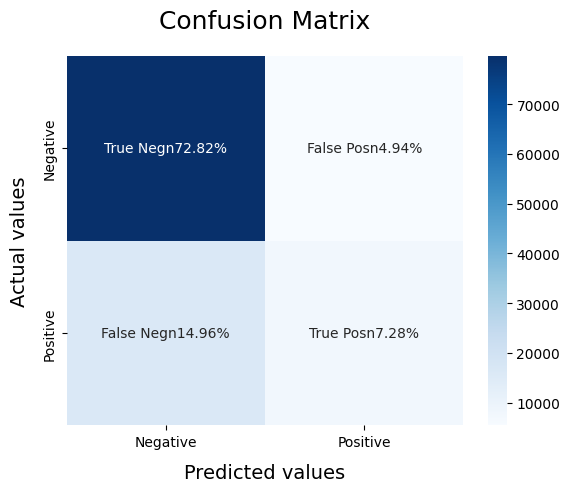

In [ ]:
log_model = LogisticRegression(random_state=2)


log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

model_Evaluate(log_model)

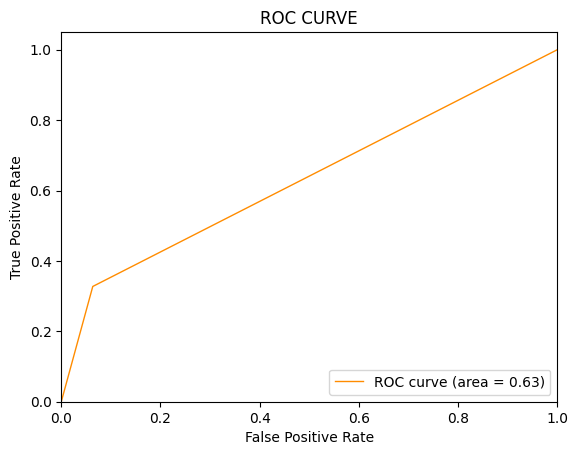

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
log_model.fit(X_scaled, y_train)

LogisticRegression(random_state=2)

In [ ]:
coefs = pd.Series(index = X.columns, data = log_model.coef_[0])


<Axes: >

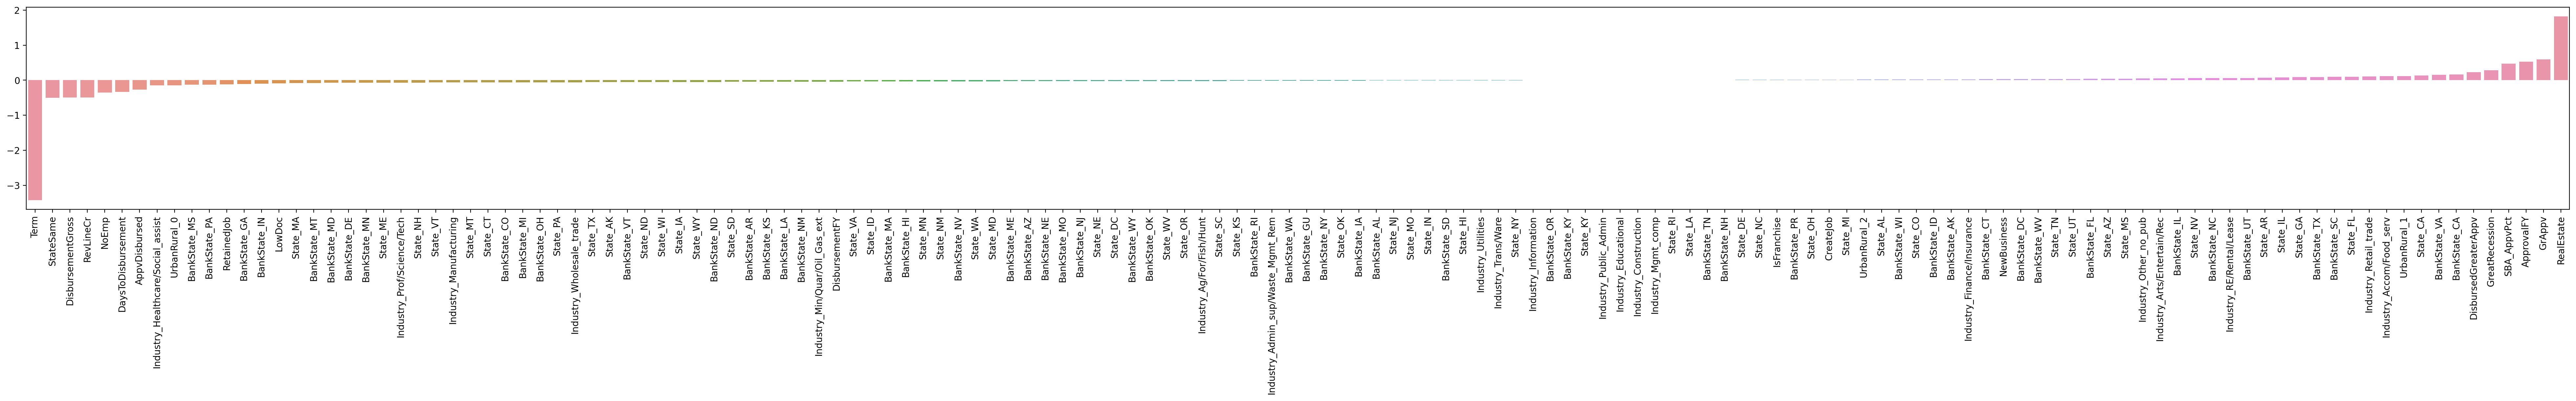

In [ ]:
coefs = coefs.sort_values()
plt.figure(figsize=(50,4), dpi = 200)
plt.xticks(rotation=90)
sns.barplot(x = coefs.index, y = coefs.values)


In [ ]:
xgboost = XGBClassifier(random_state=2)

xgboost.fit(X_train, y_train)
y_xgbpred = xgboost.predict(X_test)


              precision    recall  f1-score   support

           0       0.97      0.98      0.97     85166
           1       0.91      0.88      0.90     24357

    accuracy                           0.96    109523
   macro avg       0.94      0.93      0.93    109523
weighted avg       0.95      0.96      0.95    109523



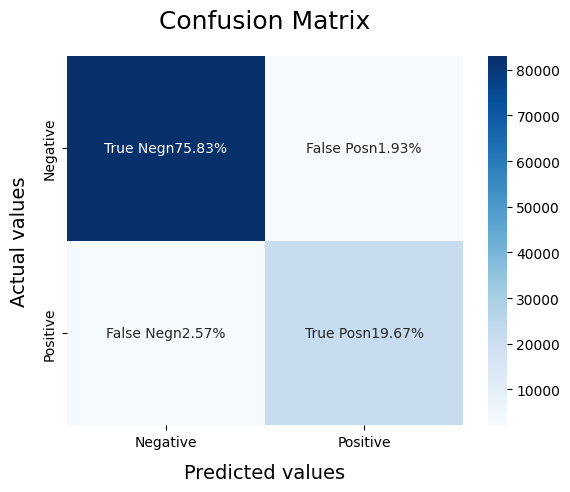

In [ ]:
model_Evaluate(xgboost)